<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법(Stochastic Gradient Descent)

>* 확률적 경사 하강법
>* (미니 배치 경사 하강법, 배치 경사 하강법)
>* 손실 함수 (Loss Function)
>* 에포크 (Epoch)

In [16]:
# 데이터 가져오기

import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [17]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# input, target 분리

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
# train, test 분리

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [7]:
# 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

확률적 경사 하강법이란 데이터를 한 번에 학습하지 않고, 점진적으로 학습하는 방법이다.

방법으로는 (Stochastic, Mini-Batch, Batch)가 있다.

In [8]:
# 확률적 경사 하강법을 사용하는 분류 패키지 = SGDClassifier

from sklearn.linear_model import SGDClassifier

# 손실함수 = Logistic loss Function (= Binary cross-entrophy function)
# Epoch = 10
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# ConvergenceWarning = 모델이 충분히 수렴하지 않았다는 뜻, mat_iter를 늘려 epoch를 늘려준다.

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [10]:
# 확률적 경사 하강법은 점진적 학습이 가능하다.
# partial_fit 메서드를 통해 추가적인 학습 가능
# 한 번 호출 할 때마다 1 Epoch씩 이어서 훈련할 수 있다.

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


In [11]:
# 에포크를 몇 번 했을 때 적합한지 찾기
# 에포크를 통해 Overfitting이나 Underfitting이 날 수 있기 때문에
# 최적의 에포크 횟수를 찾아야 한다.

import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [12]:
# partial_fit만을 통해서 모델을 훈련시키려면 partial_fit 메서드에
# 전체 클래스의 레이블을 전달해주어야 한다.

for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

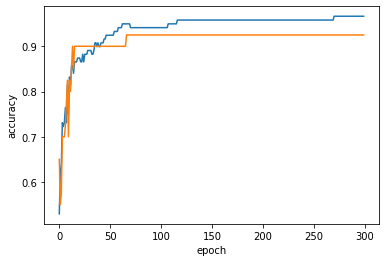

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 아래 표를 보면 100 Epoch에서 최적의 상태(훈련 세트와 테스트 세트의 차이가 크지 않음)

In [14]:
# SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고
# 멈추게 된다.

# tol 매개변수를 통해 향상될 최솟값을 정할 수 있는데 None으로 두고, 100 Epoch를
# 돌릴 수 있게 무조건 반복하도록 한다.

sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [15]:
# SGDClassifier에서 loss function의 기본 매개변수는 'hinge'이다.
# Hinge Loss는 Support Vector Machine이라 불리기도 한다.

sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
